# Final Project: Music Reviews and tf-idf

In [367]:
commentsdata = pd.read_csv("Downloads/coverscom_jupyter2.csv")

import libraries

In [368]:
import pandas as pd

In [369]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [370]:
import altair as alt

In [371]:
commentsdata.head()

,R1,R2,R3,R4,R6,R7,R5,text,orientation,videoid
0,All those knobs and lights and furbies! I was ...,What a creative and energetic performance. I l...,It's so creative that it took me half the vide...,"I'm assuming that this is a cover of ""One More...",This was very creative but just too much for m...,"I don't know the original, so hard for me to k...",Now this is a collision one doesn't expect! T...,All those knobs and lights and furbies! I was ...,0.0,13.0
1,I had a lot of trouble with the vocals in this...,A punk string quartet with a mandolin instead ...,This was incredible! Such talented musicians. ...,Something about this group feels very authenti...,All instrumentals of pop songs are creative an...,"I liked it--they're musically clean, and the u...","Of all the tracks so far, this is the one that...",I had a lot of trouble with the vocals in this...,0.0,12.0
2,"I have to admit, I have a tough time with a ca...",Great cover using only vocalizing. It was crea...,Definitely different to what you normally see ...,He has a nice voice and I appreciate the pract...,NaN,Putting this into a totally vocal interpretati...,An approach that necessarily requires creativi...,"I have to admit, I have a tough time with a ca...",0.0,17.0
3,I thought this video was super creative! They ...,"The cover was definitely creative, involving s...",I had no idea a piano could be played in this ...,It is evident that a lot of thought and practi...,I am very impressed that they were able to use...,It doesn't push any big boundaries--I've seen ...,"If it weren't for the video, I think this cove...",I thought this video was super creative! They ...,0.0,4.0
4,I thought this was really creative! I've never...,This guy's joy and energy were infectious. He ...,It's obviously a stand out video for the instr...,I really liked that this was played on such a ...,I’ve never seen that instrument used on a regu...,"The instrumentation is unique, but the genre, ...","With this cover, it's about NOVELTY in instrum...",I thought this was really creative! I've never...,0.0,5.0


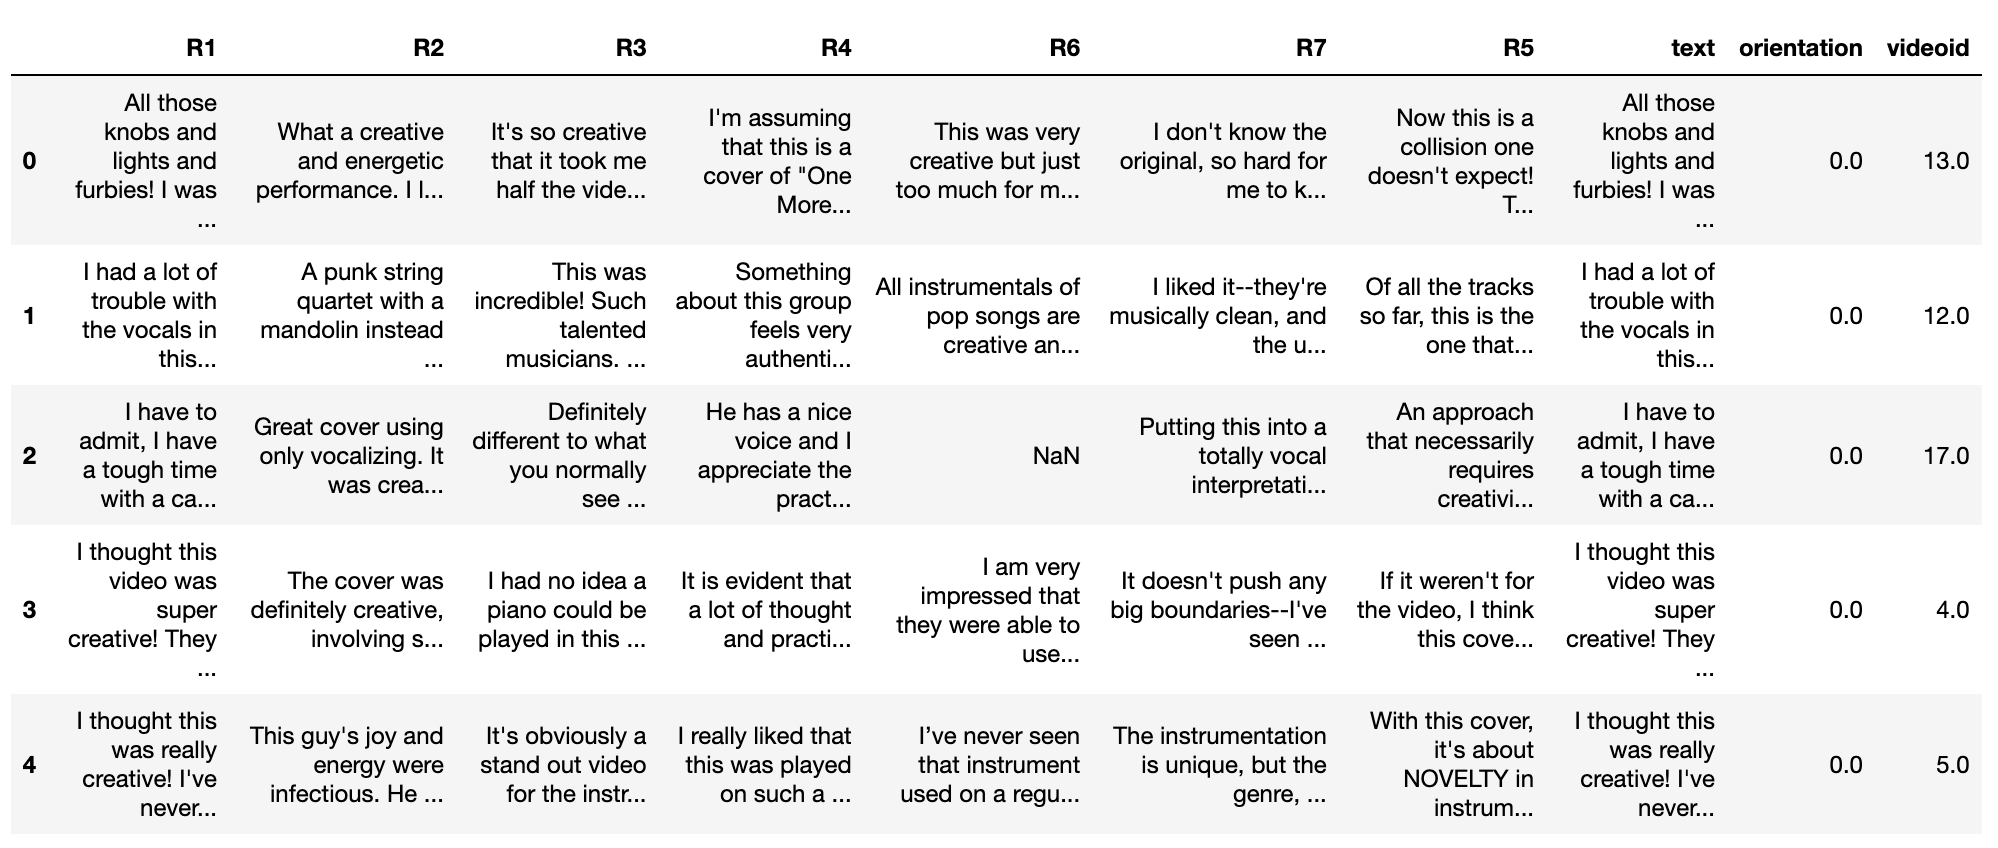

## clean data

In [372]:
commentsdata = commentsdata.fillna('')

adapted code from Fake News Detection Project Using Machine Learning to clean the data <a> "https://ai.plainenglish.io/fake-news-detection-project-using-machine-learning-explained-with-code-8f83ae5f7a26" >Link to code</a>

In [375]:
port_stem = PorterStemmer()

In [376]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content 
                       if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [377]:
commentsdata['text1'] = commentsdata['text'].apply(stemming)

## starting with TfidfVectorizer

I adapted code from class

In [378]:
vectorizer = TfidfVectorizer(max_features=100)

In [379]:
tfidf_vector = vectorizer.fit_transform(commentsdata['text1'])

In [380]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

adding orient from original .csv file for dataframe index 

In [384]:
orient = commentsdata['orientation']

creating dataframe with TfidfVectorizer output

In [388]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index = orient, columns=vectorizer.get_feature_names_out())

In [389]:
tfidf_df.head(30)

,ad,add,also,anyth,appreci,approach,arrang,artist,back,beat,...,use,version,video,vocal,vocalist,voic,watch,way,well,would
orientation,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.086221,0.000000,0.076854,0.000000,0.072793,0.097950,0.105145,...,0.065598,0.059366,0.262394,0.000000,0.000000,0.000000,0.086221,0.000000,0.000000,0.145587
0.0,0.000000,0.102114,0.084759,0.000000,0.000000,0.000000,0.089885,0.075887,0.000000,0.000000,...,0.136773,0.247557,0.000000,0.065030,0.109614,0.075887,0.000000,0.068387,0.000000,0.000000
0.0,0.000000,0.000000,0.000000,0.000000,0.078462,0.074169,0.249622,0.070249,0.000000,0.202941,...,0.253224,0.114583,0.063306,0.240794,0.000000,0.280998,0.000000,0.063306,0.057291,0.070249
0.0,0.000000,0.000000,0.085887,0.000000,0.000000,0.324751,0.091082,0.076898,0.000000,0.000000,...,0.138594,0.000000,0.138594,0.000000,0.000000,0.000000,0.091082,0.138594,0.000000,0.076898
0.0,0.086569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092452,0.000000,...,0.123832,0.056033,0.185748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068707
0.0,0.000000,0.000000,0.072548,0.076936,0.000000,0.068578,0.000000,0.000000,0.000000,0.281468,...,0.117069,0.105947,0.234138,0.000000,0.000000,0.129909,0.076936,0.175604,0.158920,0.000000
0.0,0.081523,0.174126,0.072266,0.000000,0.000000,0.000000,0.000000,0.000000,0.087063,0.000000,...,0.058307,0.211070,0.174921,0.055445,0.186916,0.064702,0.076637,0.233229,0.211070,0.000000
0.0,0.000000,0.000000,0.000000,0.081410,0.076767,0.072567,0.162820,0.068732,0.000000,0.000000,...,0.000000,0.056054,0.185816,0.000000,0.000000,0.000000,0.081410,0.061939,0.000000,0.206196
0.0,0.082386,0.000000,0.073031,0.000000,0.073031,0.000000,0.077448,0.065387,0.000000,0.000000,...,0.176772,0.000000,0.117848,0.056032,0.000000,0.000000,0.077448,0.176772,0.106652,0.065387


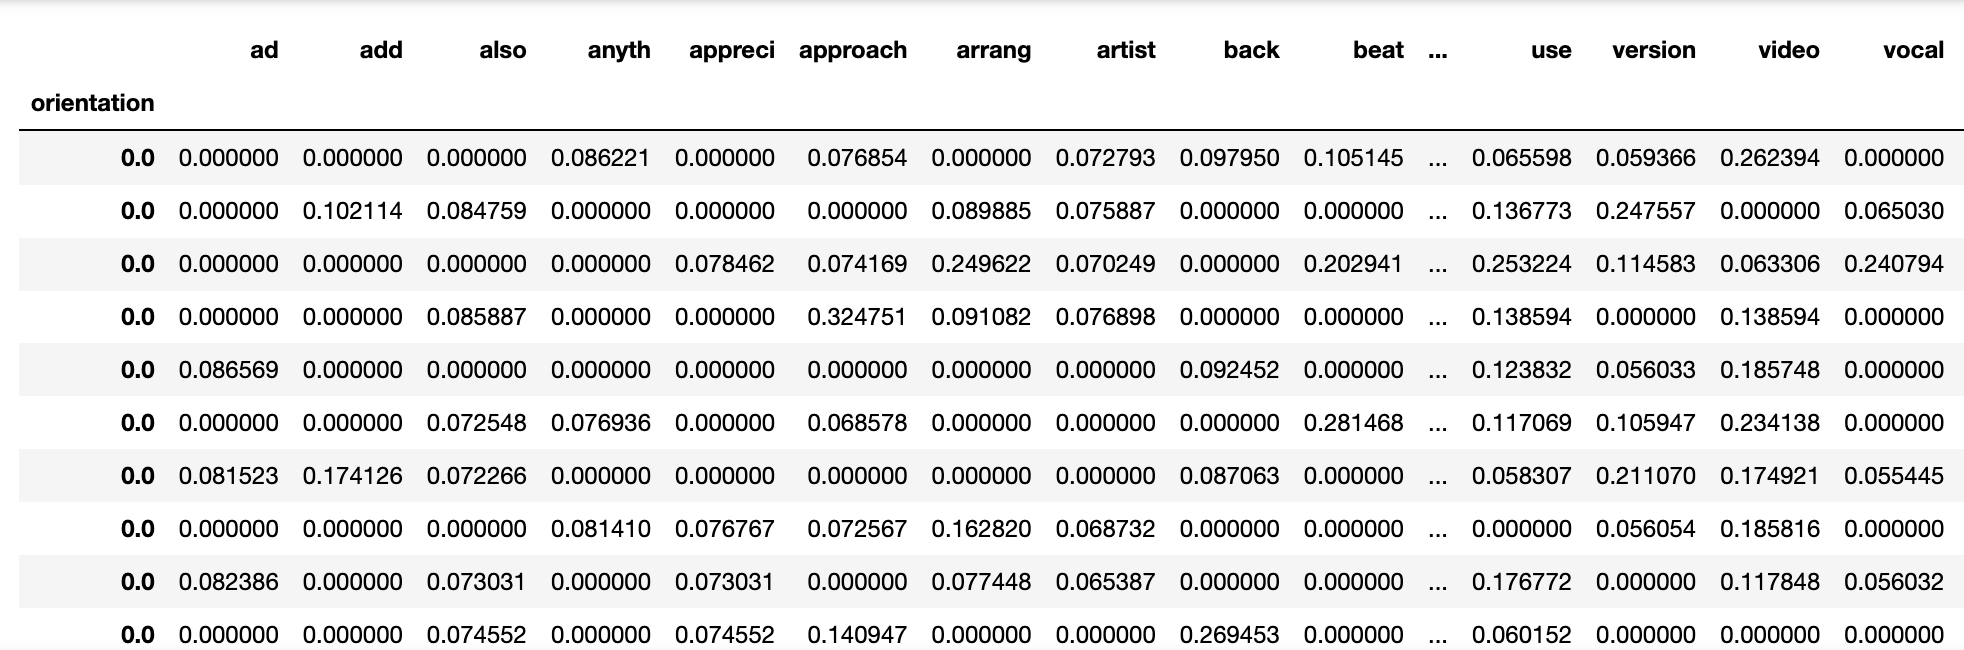

## Preparing data for visaulizations and making visualizations

creating dataframe with a subset of the terms

In [392]:
tfidf_slice = tfidf_df[['creativ', 'origin', 'uniqu']]

In [393]:
tfidf_slice.stack().reset_index()

,orientation,level_1,0
0,0.0,creativ,0.373391
1,0.0,origin,0.146853
2,0.0,uniqu,0.000000
3,0.0,creativ,0.145973
4,0.0,origin,0.204127
5,0.0,uniqu,0.084759
6,0.0,creativ,0.225214
7,0.0,origin,0.141721
8,0.0,uniqu,0.156923
9,0.0,creativ,0.147916


In [394]:
slice2 = tfidf_slice.stack().reset_index()

In [395]:
slice2

,orientation,level_1,0
0,0.0,creativ,0.373391
1,0.0,origin,0.146853
2,0.0,uniqu,0.000000
3,0.0,creativ,0.145973
4,0.0,origin,0.204127
5,0.0,uniqu,0.084759
6,0.0,creativ,0.225214
7,0.0,origin,0.141721
8,0.0,uniqu,0.156923
9,0.0,creativ,0.147916


In [396]:
tfidf_slice1 = slice2.rename(columns={0:'tfidf', 'orientation': 'orient','level_1': 'term'})

In [397]:
tfidf_slice1

,orient,term,tfidf
0,0.0,creativ,0.373391
1,0.0,origin,0.146853
2,0.0,uniqu,0.000000
3,0.0,creativ,0.145973
4,0.0,origin,0.204127
5,0.0,uniqu,0.084759
6,0.0,creativ,0.225214
7,0.0,origin,0.141721
8,0.0,uniqu,0.156923
9,0.0,creativ,0.147916


code for bar charts below adapted from Eric Monson GitHub Repository <a>"https://github.com/emonson/altair-vis-python/blob/master/36_NatureBarValuesExpanded.ipynb" >Link to code</a>

In [398]:
bar9 = alt.Chart(tfidf_slice1).mark_bar().encode(
    x='term',
    y='tfidf', 
    color = 'orient')

In [399]:
bar9

alt.Chart(...)

creating dataframe with all terms

In [400]:
tfidf_df1 = tfidf_df.stack().reset_index()

In [401]:
print(tfidf_df1)

      orientation  level_1         0
0             0.0       ad  0.000000
1             0.0      add  0.000000
2             0.0     also  0.000000
3             0.0    anyth  0.086221
4             0.0  appreci  0.000000
...           ...      ...       ...
1995          1.0     voic  0.000000
1996          1.0    watch  0.000000
1997          1.0      way  0.112016
1998          1.0     well  0.101374
1999          1.0    would  0.186453

[2000 rows x 3 columns]


In [402]:
tfidf_df1 = tfidf_df1.rename(columns={0:'tfidf', 'level_0': 'orient','level_1': 'term'})

code for sorting and grouping columns from CUNY Graduate Center Workshop <a> "https://gc-dri.github.io/Dhrift-GC/workshops/pandas/?page=9" >Link to code</a>

In [403]:
tfidf_df1.sort_values(by=['orientation','tfidf'], ascending=[True,False]).groupby(['orientation']).head()

,orientation,term,tfidf
440,0.0,instrument,0.457601
361,0.0,part,0.413892
834,0.0,guitar,0.387240
15,0.0,creativ,0.373391
915,0.0,creativ,0.342388
1834,1.0,guitar,0.509222
1610,1.0,chang,0.437539
1565,1.0,pretti,0.422802
1411,1.0,chord,0.399690
1275,1.0,someth,0.396157


creating dataframe with top 50 and top 10 terms

In [404]:
top_tfidf4 = tfidf_df1.sort_values(by=['orientation','tfidf'], ascending=[True,False]).groupby(['orientation']).head(50)

In [405]:
print(top_tfidf4)

      orientation        term     tfidf
440           0.0  instrument  0.457601
361           0.0        part  0.413892
834           0.0      guitar  0.387240
15            0.0     creativ  0.373391
915           0.0     creativ  0.342388
964           0.0        play  0.326622
305           0.0    approach  0.324751
444           0.0        like  0.323421
133           0.0       great  0.320484
364           0.0        play  0.313567
54            0.0       music  0.311892
874           0.0       skill  0.309792
731           0.0          go  0.307068
144           0.0        like  0.306190
576           0.0        song  0.305759
660           0.0      origin  0.304571
940           0.0  instrument  0.296376
59            0.0         one  0.291173
737           0.0     harmoni  0.290266
509           0.0        beat  0.281468
578           0.0       stand  0.281468
295           0.0        voic  0.280998
744           0.0        like  0.277320
171           0.0        show  0.269655


In [406]:
top_tfidf3 = tfidf_df1.sort_values(by=['orientation','tfidf'], ascending=[True,False]).groupby(['orientation']).head(10)

In [407]:
bar1 = alt.Chart(tfidf_df1).mark_bar().encode(
    x='term',
    y='tfidf', 
    color = 'orientation')

In [408]:
bar1

alt.Chart(...)

In [409]:
bar2 = alt.Chart(top_tfidf4).mark_bar().encode(
    x='term',
    y='tfidf', 
    color = 'orientation')

In [410]:
bar2

alt.Chart(...)

In [411]:
top_tfidf3.sort_values(by='tfidf', ascending=False)[:10]

,orientation,term,tfidf
1834,1.0,guitar,0.509222
440,0.0,instrument,0.457601
1610,1.0,chang,0.437539
1565,1.0,pretti,0.422802
361,0.0,part,0.413892
1411,1.0,chord,0.399690
1275,1.0,someth,0.396157
834,0.0,guitar,0.387240
15,0.0,creativ,0.373391
1493,1.0,vocal,0.342504


In [412]:
bar3 = alt.Chart(top_tfidf3).mark_bar().encode(
    x='term',
    y='tfidf', 
    color = 'orientation')

In [413]:
bar3

alt.Chart(...)

using CountVectorizer. Code is mostly the same as for TfidfVectorizer with a bit apapted from scikit learn website <a> "https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer" >Link to code</a>

In [414]:
cv = CountVectorizer()

In [415]:
count_vector = cv.fit_transform(commentsdata['text1'])

In [416]:
orient = commentsdata['orientation']

In [417]:
count_df = pd.DataFrame(count_vector.toarray(), index = orient, columns=cv.get_feature_names_out())

In [418]:
count_df

,abil,abl,absent,absolut,access,accompani,accompanist,accordion,acknowledg,acoust,...,without,woman,word,work,wors,would,wow,yacht,ye,youtub
orientation,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,2,0,0,0,0
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3
0.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0.0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
0.0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,0,0,0,0
0.0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0


In [419]:
count_df1 = count_df.stack().reset_index()

In [420]:
print(count_df1)

       orientation  level_1  0
0              0.0     abil  0
1              0.0      abl  0
2              0.0   absent  0
3              0.0  absolut  0
4              0.0   access  1
...            ...      ... ..
18655          1.0    would  3
18656          1.0      wow  0
18657          1.0    yacht  0
18658          1.0       ye  0
18659          1.0   youtub  0

[18660 rows x 3 columns]


In [421]:
count_df2 = count_df1.rename(columns={0:'count', 'orientation': 'orient','level_1': 'term'})

In [422]:
count_df2

,orient,term,count
0,0.0,abil,0
1,0.0,abl,0
2,0.0,absent,0
3,0.0,absolut,0
4,0.0,access,1
...,...,...,...
18655,1.0,would,3
18656,1.0,wow,0
18657,1.0,yacht,0
18658,1.0,ye,0


In [423]:
count_df2.sort_values(by=['orient','count'], ascending=[True,False]).groupby(['orient']).head(50)

,orient,term,count
4143,0.0,instrument,9
188,0.0,creativ,8
8585,0.0,creativ,8
4197,0.0,like,7
5419,0.0,song,7
6168,0.0,origin,7
1398,0.0,like,6
6996,0.0,like,6
8808,0.0,instrument,6
9001,0.0,play,6


In [424]:
top_count = count_df2.sort_values(by=['orient','count'], ascending=[True,False]).groupby(['orient']).head(50)

In [425]:
bar4 = alt.Chart(top_count).mark_bar().encode(
    x='term',
    y='count', 
    color = 'orient')

In [426]:
bar4

alt.Chart(...)

In [427]:
top_count1 = count_df2.sort_values(by=['orient','count'], ascending=[True,False]).groupby(['orient']).head(10)

In [428]:
bar5 = alt.Chart(top_count1).mark_bar().encode(
    x='term',
    y='count', 
    color = 'orient')

In [429]:
bar6

alt.Chart(...)